In [148]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [149]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [150]:
len(X_train)

60000

In [151]:
len(X_test)

10000

In [152]:
X_train[0].shape

(28, 28)

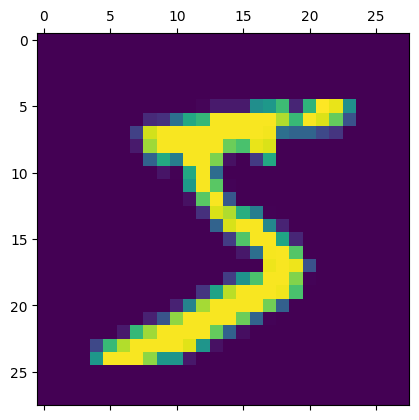

In [153]:
plt.matshow(X_train[0])

In [154]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)
X_train_flattened.shape

(60000, 784)

In [155]:
X_train_flattened = X_train_flattened.astype('float32') / 255
X_test_flattened = X_test_flattened.astype('float32') / 255

In [156]:
print(X_train_flattened.dtype, y_train.dtype)

float32 uint8


In [157]:
len(y_train)

60000

In [164]:
## Neural network model using sigmoid as the output layer and sparse_categorical_crossentropy as the loss function

import tensorflow as tf
from tensorflow import keras
# from tensorflow.keras.layers import TextVectorization, Embedding, Dense, Dropout, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

model_sigmoid = keras.Sequential([
    keras.layers.Dense(128, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

# Compile the model
model_sigmoid.compile(optimizer=Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=[
                  'accuracy'
              ])


In [165]:
#Train and evaluate the model for sigmoid activation with sparse cateforical cross entropy

model_sigmoid.fit(x=X_train_flattened, y=y_train, epochs=10)
loss_sigmoid, accuracy_sigmoid = model_sigmoid.evaluate(x=X_test_flattened, y=y_test)

print("Using the sigmoid activation function and loss = sparse_categorical_crossentropy: ")
print(f"Accuracy: {accuracy_sigmoid}")
# print(f"Precision: {precision_bc}")
# print(f"Recall: {recall_bc}")
# print(f"F-score: {f_score_bc}")

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8828 - loss: 0.4187
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9655 - loss: 0.1191
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9763 - loss: 0.0789
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9832 - loss: 0.0543
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9858 - loss: 0.0437
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9900 - loss: 0.0319
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9921 - loss: 0.0256
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9936 - loss: 0.0208
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9944 - loss: 0.0178
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9959 - loss: 0.0145
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 735us/step - accuracy: 0.9751 - loss: 0.0943
Using the sigmoid activation function and 

In [166]:
## Neural network model using softmax as the output layer and sparse_categorical_crossentropy as the loss function

model_softmax = keras.Sequential([
    # Dropout(0.2),
    keras.layers.Dense(128, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model_softmax.compile(optimizer=Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=[
                  'accuracy'
              ])

In [167]:
#Train and evaluate the model for softmax activation with mean square error as the activation function

model_softmax.fit(x=X_train_flattened, y=y_train, epochs=10, validation_split=0.2)
loss_softmax, accuracy_softmax = model_softmax.evaluate(x=X_test_flattened, y=y_test)

print("Using the softmax activation function and loss = sparse_categorical_crossentropy: ")
print(f"Accuracy: {accuracy_softmax}")

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8690 - loss: 0.4681 - val_accuracy: 0.9513 - val_loss: 0.1677
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9586 - loss: 0.1385 - val_accuracy: 0.9653 - val_loss: 0.1241
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9748 - loss: 0.0864 - val_accuracy: 0.9696 - val_loss: 0.1041
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9805 - loss: 0.0665 - val_accuracy: 0.9727 - val_loss: 0.0935
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9860 - loss: 0.0473 - val_accuracy: 0.9746 - val_loss: 0.0892
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9900 - loss: 0.0362 - val_accuracy: 0.9744 - val_loss: 0.0932
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9913 - loss: 0.0287 - val_accuracy: 0.9745 - val_loss: 0.0900
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9934 - loss: 0.0238 - 

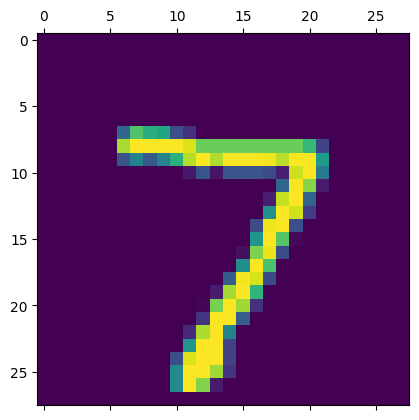

In [168]:
plt.matshow(X_test[0])

In [169]:
#Using activation = sigmoid

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_prediction_probability_sigmoid = model_sigmoid.predict(X_test_flattened)
y_prediction_probability_sigmoid[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 788us/step


array([3.0657710e-03, 6.6869111e-06, 8.0230674e-03, 9.6478879e-01,
       4.3287812e-07, 5.0240655e-05, 5.2186987e-08, 9.9996829e-01,
       1.3682038e-03, 2.6354227e-02], dtype=float32)

In [170]:
np.argmax(y_prediction_probability_sigmoid[0]) #Correct prediction

7

In [171]:
#Using activation = softmax

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_prediction_probability_softmax = model_sigmoid.predict(X_test_flattened)
y_prediction_probability_softmax[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 763us/step


array([3.0657710e-03, 6.6869111e-06, 8.0230674e-03, 9.6478879e-01,
       4.3287812e-07, 5.0240655e-05, 5.2186987e-08, 9.9996829e-01,
       1.3682038e-03, 2.6354227e-02], dtype=float32)

In [172]:
np.argmax(y_prediction_probability_softmax[0]) #Correct prediction

7

Activation = sigmoid


Text(45.722222222222214, 0.5, 'Truth')

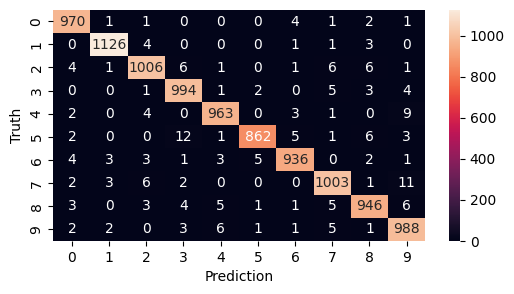

In [175]:
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, [np.argmax(x) for x in y_prediction_probability_sigmoid])
print('--- Confusion Matrix:: Activation = sigmoid')
plt.figure(figsize = (6,3))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Prediction")
plt.ylabel("Truth")

--- Confusion Matrix:: Activation = softmax


Text(45.722222222222214, 0.5, 'Truth')

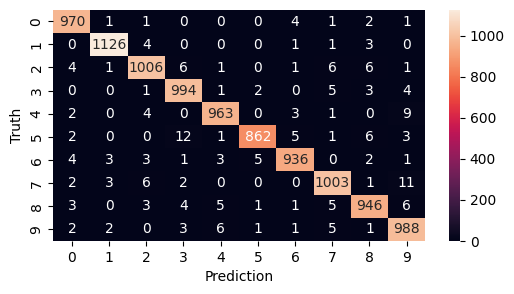

In [176]:
#Using activation = softmax

cm = confusion_matrix(y_test, [np.argmax(x) for x in y_prediction_probability_softmax])
print('--- Confusion Matrix:: Activation = softmax')
plt.figure(figsize = (6,3))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Prediction")
plt.ylabel("Truth")